**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Juan José Ponce Estrada
*   MATRÍCULA: A01659811

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5/Actividad5Preprocesamiento"
os.chdir(DIR)
os.listdir('/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5')

['Actividad5_Preprocesamiento.ipynb', 'Actividad5Preprocesamiento']

In [29]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5/Actividad5Preprocesamiento"
os.chdir(DIR)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5/Actividad5Preprocesamiento/responses.csv")

1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [34]:
# Utilizamos el método info() para ver la información del DataFrame
df_info = df.info()

# Separamos las columnas numéricas (dtype 'number') y las columnas de texto (dtype 'object')
numerical_columns = df.select_dtypes(include=['number'])
text_columns = df.select_dtypes(include=['object'])

# Imprimimos cuántas variables numéricas y cuántas de texto existen
num_numerical = numerical_columns.shape[1]
num_text = text_columns.shape[1]
print(f'Variables numéricas: {num_numerical}')
print(f'Variables de texto: {num_text}')

# Utilizamos describe() para obtener el resumen estadístico de las columnas numéricas
numerical_summary = numerical_columns.describe()

# Y también para las columnas de texto
text_summary = text_columns.describe()

# Mostramos los resúmenes descriptivos
print("Resumen de estadísticas descriptivas para variables numéricas:")
print(numerical_summary)

print("\nResumen de estadísticas descriptivas para variables de texto:")
print(text_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
Variables numéricas: 139
Variables de texto: 11
Resumen de estadísticas descriptivas para variables numéricas:
             Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


La variable 'Weight' es de tipo float64.
La variable 'Weight' es de tipo numérica continua. Se elige un histograma para su representación.


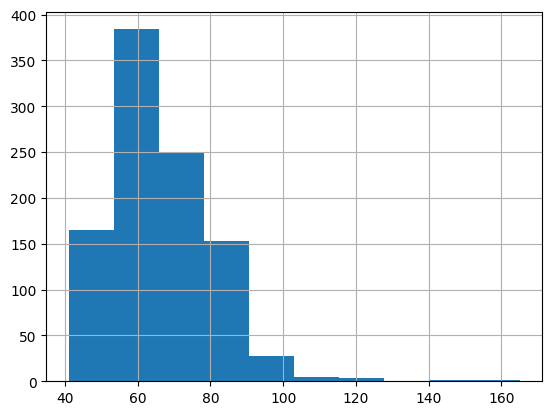

In [36]:
if 'Weight' in df.columns:
    weight_type = df['Weight'].dtype
    print(f"La variable 'Weight' es de tipo {weight_type}.")

    # Generamos el gráfico adecuado
    if pd.api.types.is_numeric_dtype(df['Weight']):
        # La variable 'Weight' es numérica continua, por lo que se elige un histograma
        print("La variable 'Weight' es de tipo numérica continua. Se elige un histograma para su representación.")
        df['Weight'].hist(bins=10)
    else:
        # Si la variable no fuera numérica, se utilizaría un gráfico de barras
        print("La variable 'Weight' no es numérica, se debería utilizar un gráfico de barras.")
        #La variable Weight se clasifica como numérica continua (si contiene valores numéricos como flotantes o enteros que representan peso). Para variables numéricas continuas, un histograma es ideal ya que permite visualizar la distribución de los valores en intervalos, lo que ayuda a analizar cómo están distribuidos los datos en rangos de peso.


3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [43]:
# Clasificación de la distribución del peso según su asimetría
from scipy.stats import skew

# Removemos los valores nulos para el análisis
weight_cleaned = df['Weight'].dropna()

# Calculamos la asimetría (skewness)
skewness_value = skew(weight_cleaned)

# Clasificación de la asimetría
print(f"El valor de la asimetría (skewness) es: {skewness_value}")

if skewness_value > 0:
    print("La distribución del peso es asimétrica positiva (sesgada a la derecha).")
elif skewness_value < 0:
    print("La distribución del peso es asimétrica negativa (sesgada a la izquierda).")
else:
    print("La distribución del peso es simétrica.")



print("Una asimetría positiva significa que la mayoría de los valores de la distribución están concentrados hacia la izquierda (en los valores menores), mientras que la cola de la distribución se extiende hacia la derecha, es decir, hay algunos valores mucho mayores que el resto. Este comportamiento es característico de distribuciones donde los valores más grandes son relativamente infrecuentes.")
print("El valor numérico de 1.22 confirma este sesgo, ya que es significativamente mayor que 0, lo que marca una asimetría clara hacia la derecha")

El valor de la asimetría (skewness) es: 1.2218702827632462
La distribución del peso es asimétrica positiva (sesgada a la derecha).
Una asimetría positiva significa que la mayoría de los valores de la distribución están concentrados hacia la izquierda (en los valores menores), mientras que la cola de la distribución se extiende hacia la derecha, es decir, hay algunos valores mucho mayores que el resto. Este comportamiento es característico de distribuciones donde los valores más grandes son relativamente infrecuentes.
El valor numérico de 1.22 confirma este sesgo, ya que es significativamente mayor que 0, lo que marca una asimetría clara hacia la derecha


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [44]:
# Calculamos el número de valores faltantes en la columna 'Weight'
missing_values = df['Weight'].isnull().sum()

# Calculamos el porcentaje que representan los valores faltantes
total_values = len(df['Weight'])
missing_percentage = (missing_values / total_values) * 100

# Mostramos los resultados
print(f"Valores faltantes en 'Weight': {missing_values}")
print(f"Porcentaje de valores faltantes: {missing_percentage:.2f}%")

Valores faltantes en 'Weight': 20
Porcentaje de valores faltantes: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

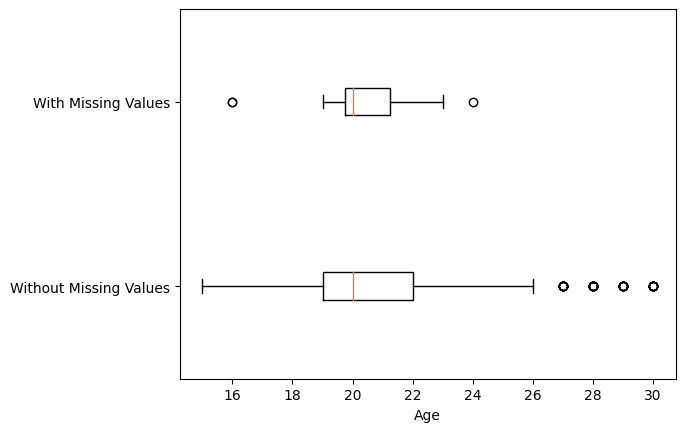

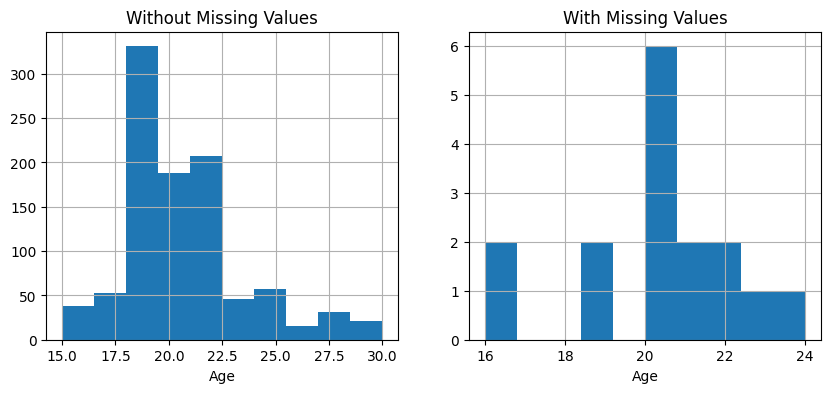

p-value of t-test: 0.7258243979822129


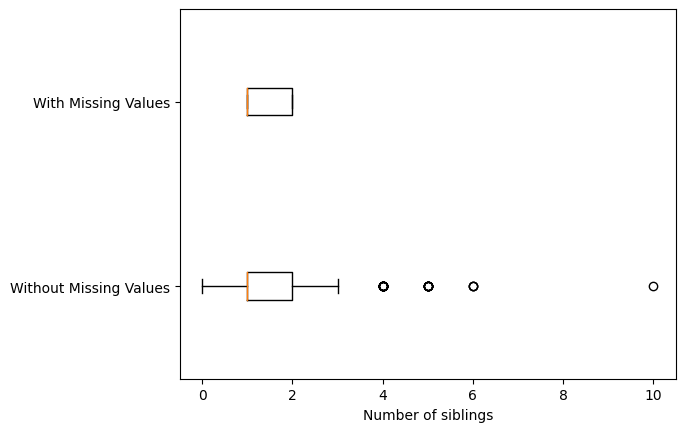

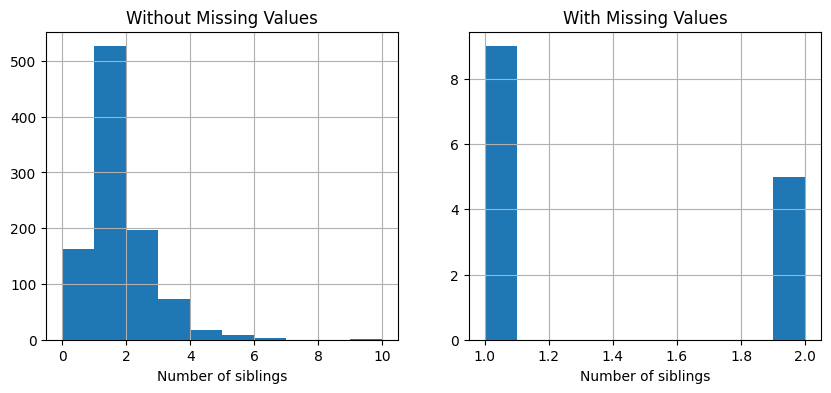

p-value of t-test: 0.8255092107556896


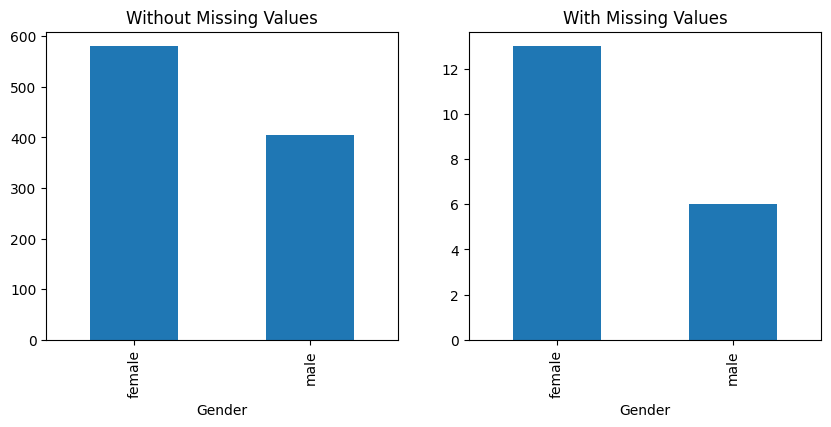

p-value of Chi_squared test: 0.5472167199163878


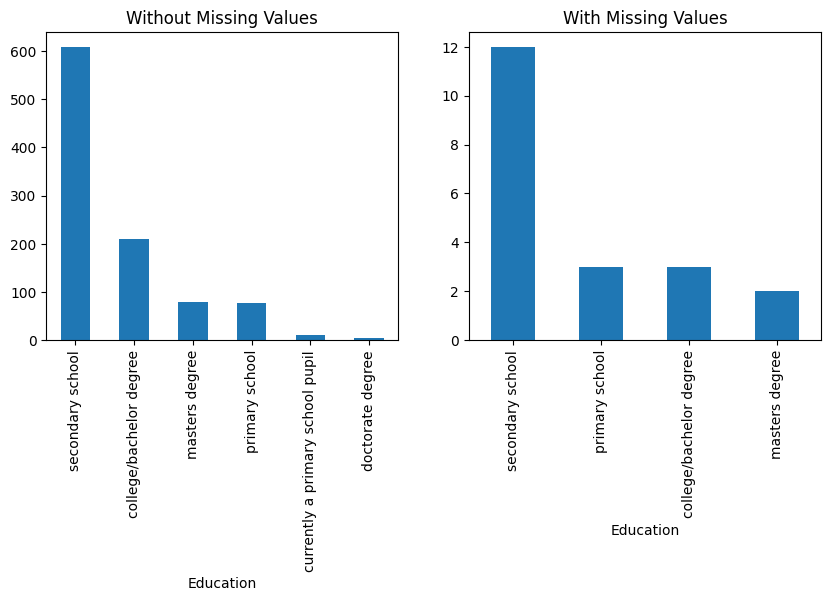

p-value of Chi_squared test: 0.8424822989541867

Conclusiones:
1. En las variables numéricas 'Age' y 'Number of siblings', los valores p de las pruebas t fueron 0.73 y 0.83 respectivamente,
   lo que indica que no hay diferencias significativas entre los grupos con y sin valores faltantes en la variable 'Weight'.
2. En las variables categóricas 'Gender' y 'Education', los valores p de las pruebas Chi-cuadrado fueron 0.55 y 0.84,
   lo que sugiere que tampoco hay diferencias significativas entre los grupos con y sin valores faltantes.
   Esto significa que los valores faltantes en Weight son probablemente MCAR (Missing Completely at Random), es decir, no están relacionados con ninguna de las variables evaluadas. 


In [49]:
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

# Función para diagnosticar valores faltantes en variables numéricas
def Diagnose_MV_Numerical(df, str_att_name, BM_MV):
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    labels = []
    box_sr = pd.Series('', index=BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr, vert=False)
    plt.yticks([1, 2], labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10, 4))

    att_range = (df[str_att_name].min(), df[str_att_name].max())

    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data, group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

# Función para diagnosticar valores faltantes en variables categóricas
def Diagnose_MV_Categorical(df, str_att_name, BM_MV):
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    plt.figure(figsize=(10, 4))
    for i, poss in enumerate(BM_MV.unique()):
        plt.subplot(1, 2, i + 1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV, df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

# Creamos una máscara booleana para identificar filas con valores faltantes en 'Weight'
BM_MV = df['Weight'].isnull()

# Análisis de las variables numéricas: 'Age' y 'Number of siblings'
Diagnose_MV_Numerical(df, 'Age', BM_MV)
Diagnose_MV_Numerical(df, 'Number of siblings', BM_MV)

# Análisis de las variables categóricas: 'Gender' y 'Education'
Diagnose_MV_Categorical(df, 'Gender', BM_MV)
Diagnose_MV_Categorical(df, 'Education', BM_MV)

# Conclusiones:
print("\nConclusiones:")
print("1. En las variables numéricas 'Age' y 'Number of siblings', los valores p de las pruebas t fueron 0.73 y 0.83 respectivamente,")
print("   lo que indica que no hay diferencias significativas entre los grupos con y sin valores faltantes en la variable 'Weight'.")
print("2. En las variables categóricas 'Gender' y 'Education', los valores p de las pruebas Chi-cuadrado fueron 0.55 y 0.84,")
print("   lo que sugiere que tampoco hay diferencias significativas entre los grupos con y sin valores faltantes.")
print("   Esto significa que los valores faltantes en Weight son probablemente MCAR (Missing Completely at Random), es decir, no están relacionados con ninguna de las variables evaluadas. ")

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [50]:
# Calculamos la mediana de la columna 'Weight'
median_weight = df['Weight'].median()

# Imputamos los valores faltantes con la mediana
df['Weight'].fillna(median_weight, inplace=True)

# Verificamos si quedan valores faltantes
print(f"Valores faltantes después de la imputación: {df['Weight'].isnull().sum()}")

# Justificación:
print("La mediana es recomendable para imputar los valores faltantes de 'Weight' debido a que la distribución de esta variable es asimétrica positiva. "
      "La mediana es menos sensible a los valores atípicos o extremos, a diferencia de la media, por lo que es una mejor representación del valor central en distribuciones sesgadas.")

Valores faltantes después de la imputación: 0
La mediana es recomendable para imputar los valores faltantes de 'Weight' debido a que la distribución de esta variable es asimétrica positiva. La mediana es menos sensible a los valores atípicos o extremos, a diferencia de la media, por lo que es una mejor representación del valor central en distribuciones sesgadas.


<ipython-input-50-09afd8ef0f15>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(median_weight, inplace=True)


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

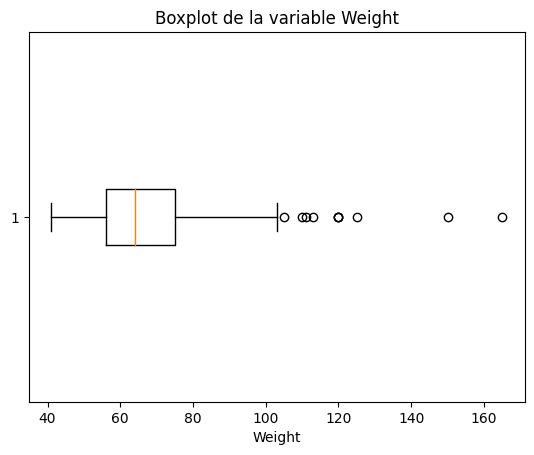

Número de valores atípicos: 10
Número de registros después de eliminar los valores atípicos: 1000


In [51]:
# Gráfico de boxplot para visualizar posibles valores atípicos en 'Weight'
plt.boxplot(df['Weight'].dropna(), vert=False)
plt.xlabel('Weight')
plt.title('Boxplot de la variable Weight')
plt.show()

# Identificamos los valores atípicos utilizando el rango intercuartílico (IQR)
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creamos un dataframe con los valores atípicos
outliers_df = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]

# Mostramos el número de valores atípicos
print(f"Número de valores atípicos: {outliers_df.shape[0]}")

# Eliminamos los valores atípicos del conjunto original
df_cleaned = df[~((df['Weight'] < lower_bound) | (df['Weight'] > upper_bound))]

# Verificamos la eliminación
print(f"Número de registros después de eliminar los valores atípicos: {df_cleaned.shape[0]}")

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

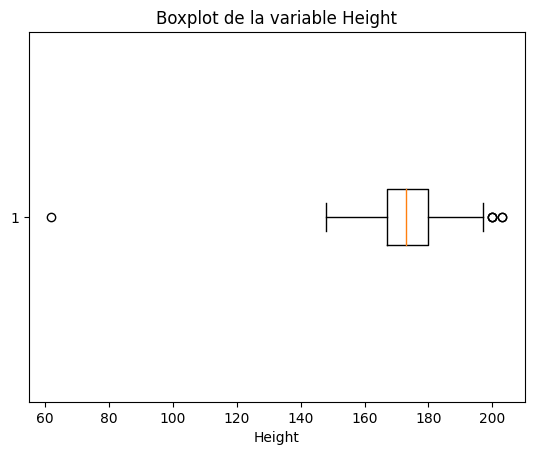

Número de valores atípicos en 'Height': 6
Número de registros después de eliminar los valores atípicos en 'Height': 1004


In [52]:
# Gráfico de boxplot para visualizar posibles valores atípicos en 'Height'
plt.boxplot(df['Height'].dropna(), vert=False)
plt.xlabel('Height')
plt.title('Boxplot de la variable Height')
plt.show()

# Identificamos los valores atípicos utilizando el rango intercuartílico (IQR) para 'Height'
Q1_height = df['Height'].quantile(0.25)
Q3_height = df['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Definimos los límites para identificar valores atípicos en 'Height'
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Creamos un dataframe con los valores atípicos de 'Height'
outliers_height_df = df[(df['Height'] < lower_bound_height) | (df['Height'] > upper_bound_height)]

# Mostramos el número de valores atípicos en 'Height'
print(f"Número de valores atípicos en 'Height': {outliers_height_df.shape[0]}")

# Eliminamos los valores atípicos de 'Height' del conjunto original
df_cleaned_height = df[~((df['Height'] < lower_bound_height) | (df['Height'] > upper_bound_height))]

# Verificamos la eliminación de los valores atípicos en 'Height'
print(f"Número de registros después de eliminar los valores atípicos en 'Height': {df_cleaned_height.shape[0]}")

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

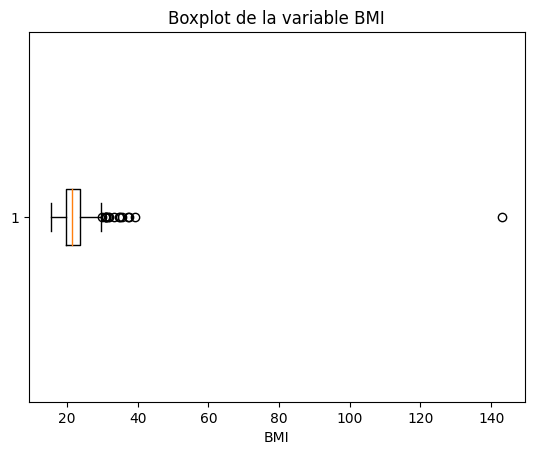

Número de encuestados que son atípicos según su BMI: 15


In [54]:
# Convertimos la altura de centímetros a metros
df['Height_meters'] = df['Height'] / 100

# Calculamos el BMI (índice de masa corporal) usando la fórmula
df['BMI'] = df['Weight'] / (df['Height_meters'] ** 2)

# Gráfico de boxplot para visualizar posibles valores atípicos en el BMI
plt.boxplot(df['BMI'].dropna(), vert=False)
plt.xlabel('BMI')
plt.title('Boxplot de la variable BMI')
plt.show()

# Identificamos los valores atípicos utilizando el rango intercuartílico (IQR) para el BMI
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Definimos los límites para identificar valores atípicos en el BMI
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Mostramos el número de valores atípicos en el BMI
print(f"Número de encuestados que son atípicos según su BMI: {outliers_bmi_df.shape[0]}")


10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

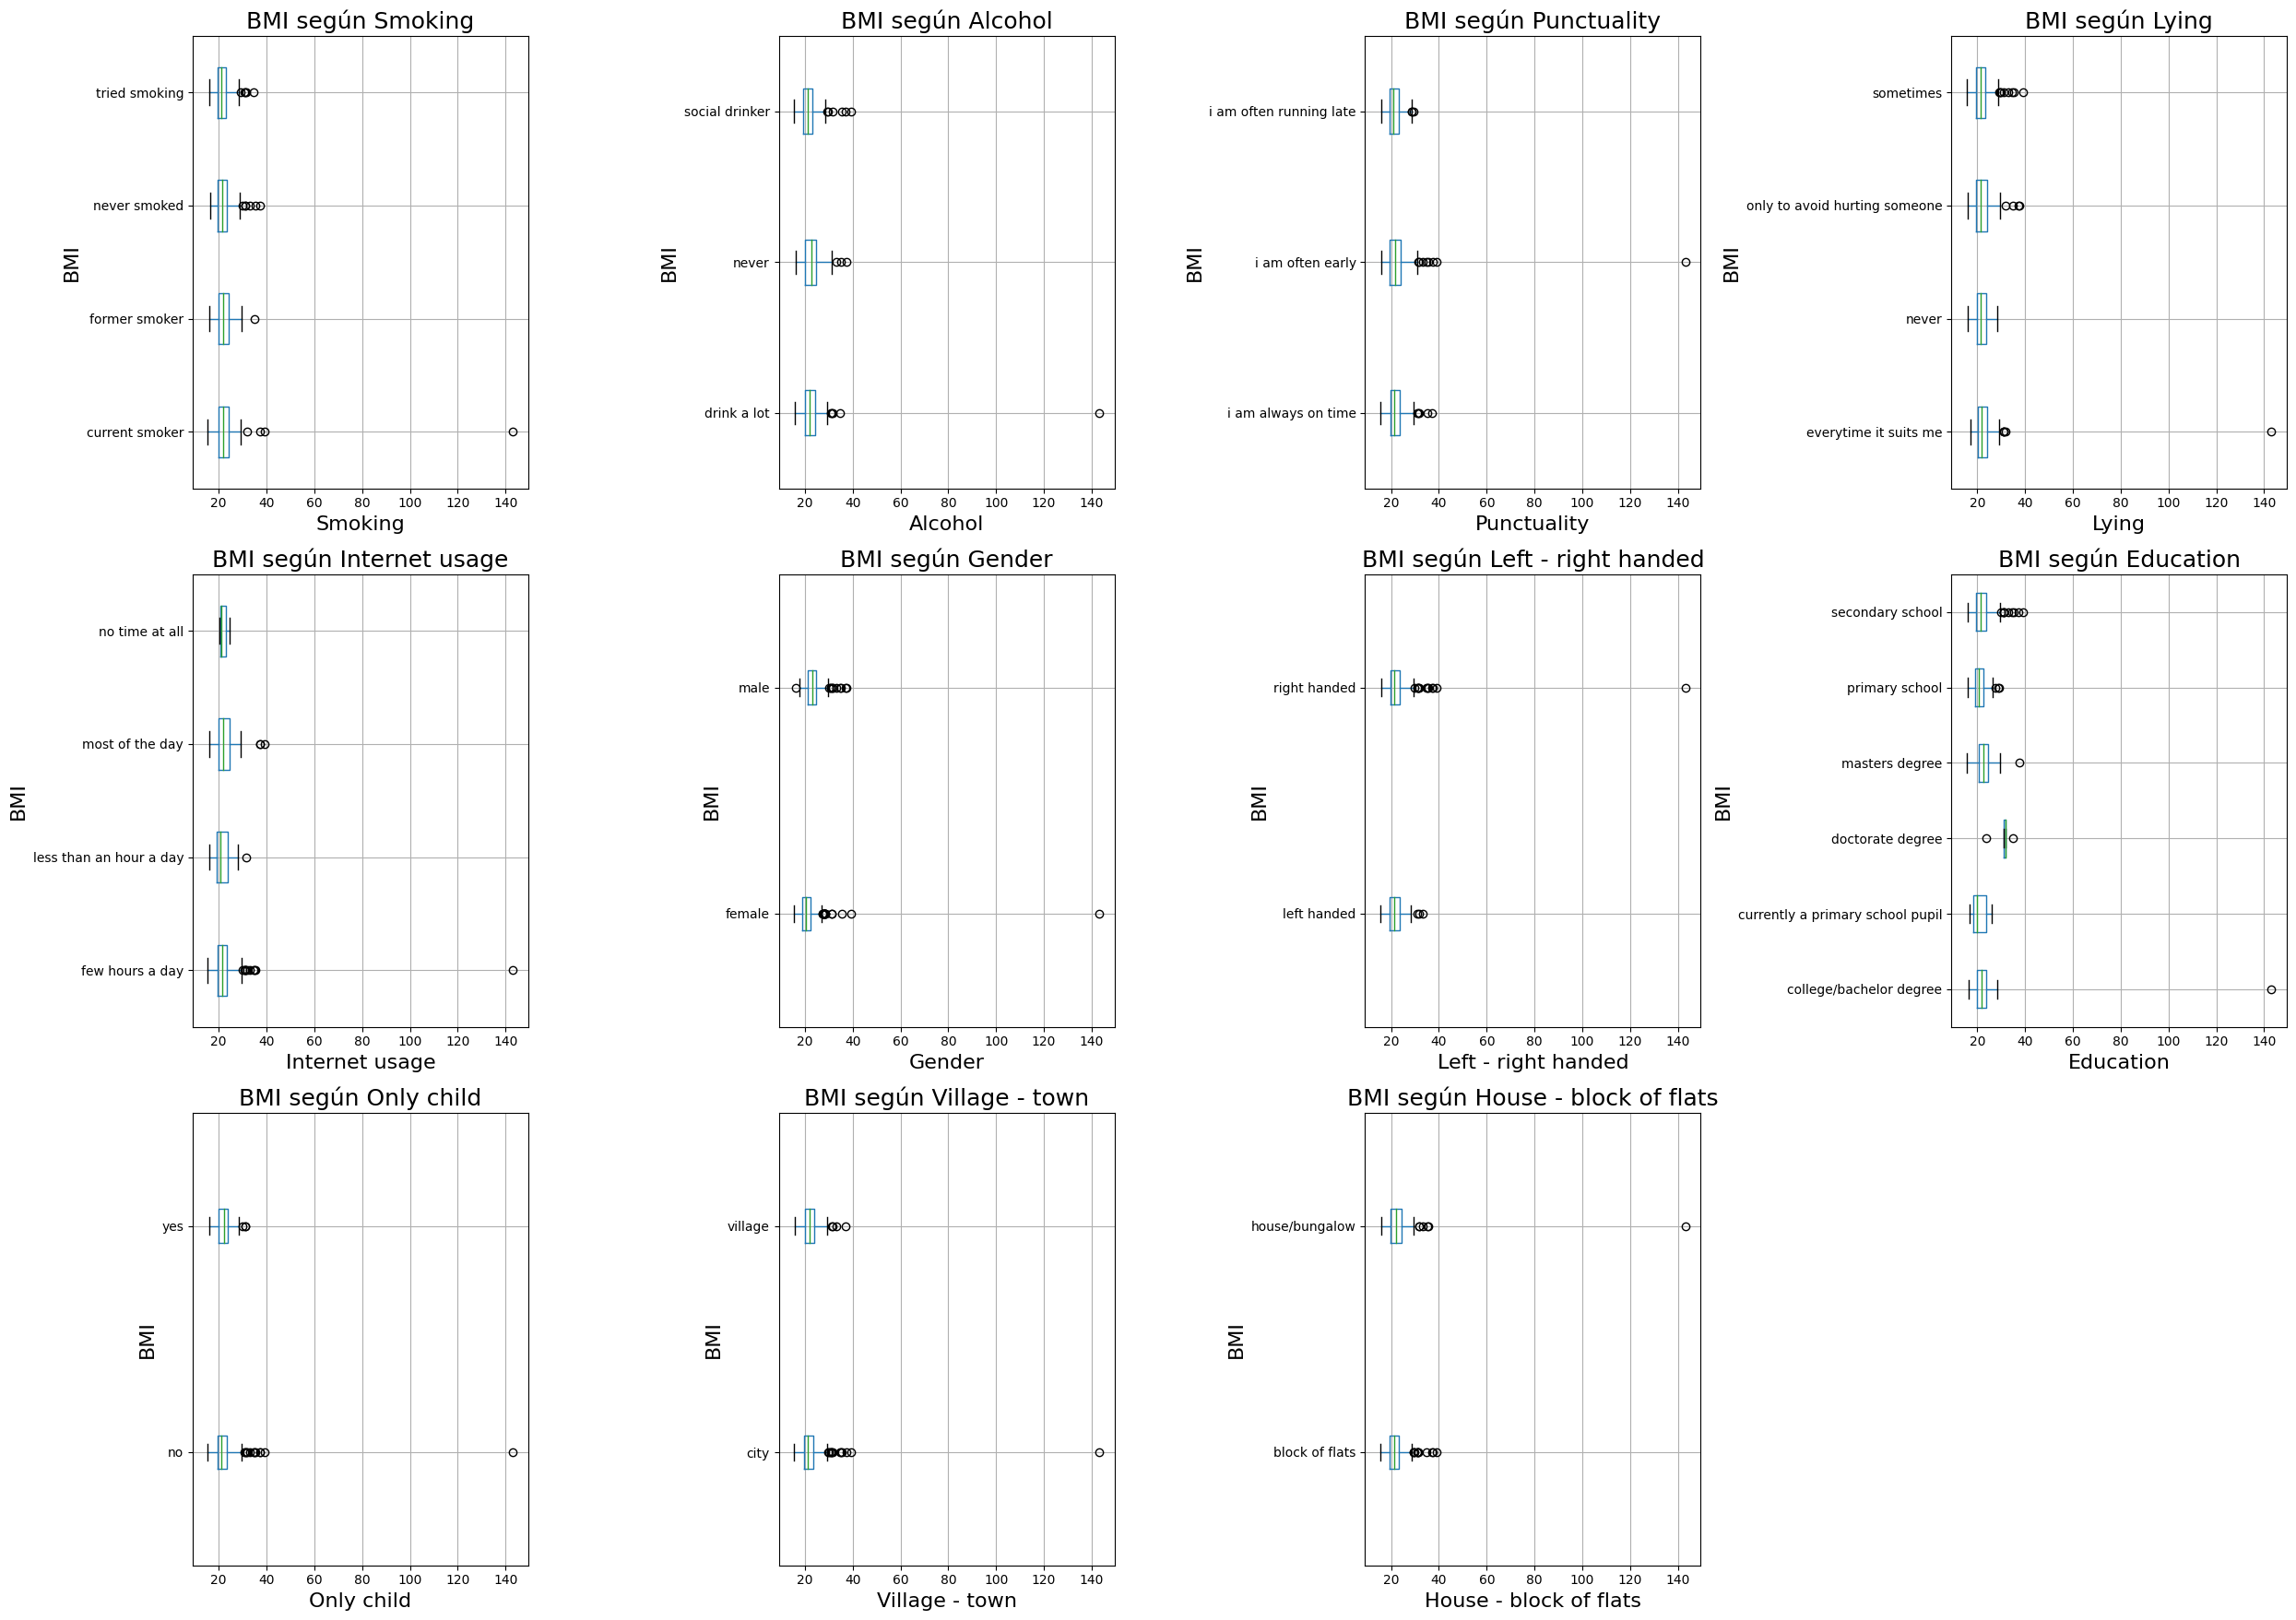

las personas que tienen nivel de educación doctorado tienden a tener un BMI superior a otros niveles de estudio


In [69]:
# Seleccionamos las variables categóricas de tipo texto (object)
categorical_columns = df.select_dtypes(include=['object']).columns

# Creamos una figura para múltiples gráficos de boxplot con un tamaño aún mayor para mejorar la legibilidad
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 18))  # Aumentamos el tamaño de la figura

# Aplanamos los ejes para iterar más fácilmente
axes = axes.flatten()

# Iteramos sobre cada variable categórica y generamos un boxplot comparando con BMI
for i, column in enumerate(categorical_columns):
    df.boxplot(column='BMI', by=column, ax=axes[i], vert=False)
    axes[i].set_title(f'BMI según {column}', fontsize=18)  # Aumentamos el tamaño de la fuente del título
    axes[i].set_xlabel(column, fontsize=16)  # Aumentamos el tamaño de la fuente del label
    axes[i].set_ylabel('BMI', fontsize=16)  # Aumentamos el tamaño de la fuente del label

# Ocultamos los subgráficos vacíos (si es que los hay)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('')  # Quitamos el título general generado por defecto
plt.show()

print("las personas que tienen nivel de educación doctorado tienden a tener un BMI superior a otros niveles de estudio")